In [8]:
import emoji
import pandas as pd
import numpy as np

In [3]:
emoji.EMOJI_UNICODE

{':1st_place_medal:': 'ü•á',
 ':2nd_place_medal:': 'ü•à',
 ':3rd_place_medal:': 'ü•â',
 ':AB_button_(blood_type):': 'üÜé',
 ':ATM_sign:': 'üèß',
 ':A_button_(blood_type):': 'üÖ∞',
 ':Afghanistan:': 'üá¶üá´',
 ':Albania:': 'üá¶üá±',
 ':Algeria:': 'üá©üáø',
 ':American_Samoa:': 'üá¶üá∏',
 ':Andorra:': 'üá¶üá©',
 ':Angola:': 'üá¶üá¥',
 ':Anguilla:': 'üá¶üáÆ',
 ':Antarctica:': 'üá¶üá∂',
 ':Antigua_&_Barbuda:': 'üá¶üá¨',
 ':Aquarius:': '‚ôí',
 ':Argentina:': 'üá¶üá∑',
 ':Aries:': '‚ôà',
 ':Armenia:': 'üá¶üá≤',
 ':Aruba:': 'üá¶üáº',
 ':Ascension_Island:': 'üá¶üá®',
 ':Australia:': 'üá¶üá∫',
 ':Austria:': 'üá¶üáπ',
 ':Azerbaijan:': 'üá¶üáø',
 ':BACK_arrow:': 'üîô',
 ':B_button_(blood_type):': 'üÖ±',
 ':Bahamas:': 'üáßüá∏',
 ':Bahrain:': 'üáßüá≠',
 ':Bangladesh:': 'üáßüá©',
 ':Barbados:': 'üáßüáß',
 ':Belarus:': 'üáßüáæ',
 ':Belgium:': 'üáßüá™',
 ':Belize:': 'üáßüáø',
 ':Benin:': 'üáßüáØ',
 ':Bermuda:': 'üáßüá≤',
 ':Bhutan:': 'üáßüáπ'

### emoji Dictionary

In [21]:
emojis ={
          0: "\u2764\uFE0F",    # :heart: prints a black instead of red heart depending on the font
          1: ":baseball:",
          2: ":beaming_face_with_smiling_eyes:",
          3: ":downcast_face_with_sweat:",
          4: ":fork_and_knife:",
        }

In [22]:
for e in emojis.values():
    print(emoji.emojize(e))

‚ù§Ô∏è
‚öæ
üòÅ
üòì
üç¥


In [23]:
#clipboard = pd.read_clipboard()

In [83]:
train_data=pd.read_csv('dataset/train_emoji.csv',header=None)
test_data=pd.read_csv('dataset/test_emoji.csv',header=None)

In [84]:
X_train = list(train_data[0])
Y_train = list(train_data[1])

X_test = list(test_data[0])
Y_test = list(test_data[1])

In [85]:
for i in range(6):
    print(X_train[i],emoji.emojize(emojis[Y_train[i]]))  

never talk to me again üòì
I am proud of your achievements üòÅ
It is the worst day in my life üòì
Miss you so much ‚ù§Ô∏è
food is life üç¥
I love you mum ‚ù§Ô∏è


### Making word-embedding Dictionary

In [86]:
embedding_dict={}
with open('glove6b50dtxt/glove.6B.50d.txt') as f:
    for line in f:
        word=line.split()[0]
        embedding=np.asarray(line.split()[1:],dtype=float)
        embedding_dict[word]=embedding

In [87]:
embedding_dict['hippo'].shape

(50,)

In [88]:
X_train=[x.split() for x in X_train]
X_test=[x.split() for x in X_test]

In [89]:
def getEmbeddingOutputVector(X):
    max_len=10
    embedding_dim=50
    embeddingVector=np.zeros((len(X),max_len,embedding_dim))
    
    for i in range(len(X)):
        for j in range(len(X[i])):
            try:
                embeddingVector[i][j]=embedding_dict[X[i][j]]
            except:
                pass
    return embeddingVector

In [90]:
embedded_X_train=getEmbeddingOutputVector(X_train)
embedded_X_test=getEmbeddingOutputVector(X_test)

In [91]:
print(embedded_X_train.shape)
print(embedded_X_test.shape)

(132, 10, 50)
(56, 10, 50)


In [114]:
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import *
from keras.callbacks import EarlyStopping

In [94]:
Y_train=to_categorical(Y_train,num_classes=5)
Y_test=to_categorical(Y_test,num_classes=5)

In [223]:
model=Sequential()
model.add(LSTM(64,input_shape=(10,50),return_sequences=True))
model.add(Dropout(0.5))
model.add(LSTM(64,return_sequences=False))
model.add(Dropout(0.5))
model.add(Dense(5))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',metrics=['acc'],optimizer='adam')

model.summary()

Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_41 (LSTM)               (None, 10, 64)            29440     
_________________________________________________________________
dropout_40 (Dropout)         (None, 10, 64)            0         
_________________________________________________________________
lstm_42 (LSTM)               (None, 64)                33024     
_________________________________________________________________
dropout_41 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_27 (Dense)             (None, 5)                 325       
_________________________________________________________________
activation_27 (Activation)   (None, 5)                 0         
Total params: 62,789
Trainable params: 62,789
Non-trainable params: 0
_________________________________________________

In [224]:
checkpoint=EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    patience=10,
    verbose=0,
    mode='auto',
    baseline=None,
    restore_best_weights=True,
)

hist=model.fit(embedded_X_train,Y_train,epochs=700,batch_size=32,validation_split=0.2)

Train on 105 samples, validate on 27 samples
Epoch 1/700
105/105 [==============================] - 3s 25ms/step - loss: 1.6015 - acc: 0.3143 - val_loss: 1.6114 - val_acc: 0.2222
Epoch 2/700
105/105 [==============================] - 0s 507us/step - loss: 1.5361 - acc: 0.3619 - val_loss: 1.6160 - val_acc: 0.2222
Epoch 3/700
105/105 [==============================] - 0s 514us/step - loss: 1.5329 - acc: 0.3143 - val_loss: 1.6288 - val_acc: 0.2222
Epoch 4/700
105/105 [==============================] - 0s 501us/step - loss: 1.4834 - acc: 0.3619 - val_loss: 1.6392 - val_acc: 0.2222
Epoch 5/700
105/105 [==============================] - 0s 473us/step - loss: 1.4565 - acc: 0.3905 - val_loss: 1.6461 - val_acc: 0.2222
Epoch 6/700
105/105 [==============================] - 0s 535us/step - loss: 1.4239 - acc: 0.4190 - val_loss: 1.6218 - val_acc: 0.2222
Epoch 7/700
105/105 [==============================] - 0s 528us/step - loss: 1.3936 - acc: 0.4190 - val_loss: 1.5782 - val_acc: 0.1852
Epoch 8/700

Epoch 61/700
105/105 [==============================] - 0s 424us/step - loss: 0.0188 - acc: 1.0000 - val_loss: 1.8176 - val_acc: 0.5926
Epoch 62/700
105/105 [==============================] - 0s 425us/step - loss: 0.0166 - acc: 1.0000 - val_loss: 1.8172 - val_acc: 0.6296
Epoch 63/700
105/105 [==============================] - 0s 432us/step - loss: 0.0193 - acc: 1.0000 - val_loss: 1.8428 - val_acc: 0.6296
Epoch 64/700
105/105 [==============================] - 0s 432us/step - loss: 0.0301 - acc: 0.9905 - val_loss: 1.9017 - val_acc: 0.6296
Epoch 65/700
105/105 [==============================] - 0s 432us/step - loss: 0.0259 - acc: 1.0000 - val_loss: 1.9335 - val_acc: 0.5926
Epoch 66/700
105/105 [==============================] - 0s 447us/step - loss: 0.0148 - acc: 1.0000 - val_loss: 1.9952 - val_acc: 0.5926
Epoch 67/700
105/105 [==============================] - 0s 442us/step - loss: 0.0181 - acc: 1.0000 - val_loss: 1.9713 - val_acc: 0.5926
Epoch 68/700
105/105 [==========================

105/105 [==============================] - 0s 421us/step - loss: 0.0092 - acc: 1.0000 - val_loss: 2.8887 - val_acc: 0.5185
Epoch 122/700
105/105 [==============================] - 0s 439us/step - loss: 0.0355 - acc: 0.9905 - val_loss: 2.8651 - val_acc: 0.5185
Epoch 123/700
105/105 [==============================] - 0s 436us/step - loss: 0.0383 - acc: 0.9810 - val_loss: 2.1330 - val_acc: 0.5926
Epoch 124/700
105/105 [==============================] - 0s 444us/step - loss: 0.0173 - acc: 1.0000 - val_loss: 1.8261 - val_acc: 0.6667
Epoch 125/700
105/105 [==============================] - 0s 509us/step - loss: 0.0623 - acc: 0.9905 - val_loss: 1.7360 - val_acc: 0.6667
Epoch 126/700
105/105 [==============================] - 0s 446us/step - loss: 0.0525 - acc: 0.9810 - val_loss: 1.6277 - val_acc: 0.6667
Epoch 127/700
105/105 [==============================] - 0s 426us/step - loss: 0.0137 - acc: 1.0000 - val_loss: 1.7991 - val_acc: 0.6667
Epoch 128/700
105/105 [==============================] 

Epoch 181/700
105/105 [==============================] - 0s 485us/step - loss: 0.0022 - acc: 1.0000 - val_loss: 1.8130 - val_acc: 0.7407
Epoch 182/700
105/105 [==============================] - 0s 426us/step - loss: 0.0019 - acc: 1.0000 - val_loss: 1.8140 - val_acc: 0.7407
Epoch 183/700
105/105 [==============================] - 0s 442us/step - loss: 0.0028 - acc: 1.0000 - val_loss: 1.8144 - val_acc: 0.7407
Epoch 184/700
105/105 [==============================] - 0s 436us/step - loss: 0.0021 - acc: 1.0000 - val_loss: 1.8134 - val_acc: 0.7407
Epoch 185/700
105/105 [==============================] - 0s 438us/step - loss: 0.0031 - acc: 1.0000 - val_loss: 1.8157 - val_acc: 0.7407
Epoch 186/700
105/105 [==============================] - 0s 439us/step - loss: 0.0043 - acc: 1.0000 - val_loss: 1.8188 - val_acc: 0.7407
Epoch 187/700
105/105 [==============================] - 0s 451us/step - loss: 0.0020 - acc: 1.0000 - val_loss: 1.8209 - val_acc: 0.7407
Epoch 188/700
105/105 [==================

Epoch 241/700
105/105 [==============================] - 0s 444us/step - loss: 0.0028 - acc: 1.0000 - val_loss: 1.9361 - val_acc: 0.7407
Epoch 242/700
105/105 [==============================] - 0s 444us/step - loss: 0.0033 - acc: 1.0000 - val_loss: 1.9368 - val_acc: 0.7407
Epoch 243/700
105/105 [==============================] - 0s 434us/step - loss: 0.0017 - acc: 1.0000 - val_loss: 1.9395 - val_acc: 0.7407
Epoch 244/700
105/105 [==============================] - 0s 434us/step - loss: 0.0028 - acc: 1.0000 - val_loss: 1.9426 - val_acc: 0.7407
Epoch 245/700
105/105 [==============================] - 0s 442us/step - loss: 0.0027 - acc: 1.0000 - val_loss: 1.9507 - val_acc: 0.7407
Epoch 246/700
105/105 [==============================] - 0s 430us/step - loss: 0.0026 - acc: 1.0000 - val_loss: 1.9671 - val_acc: 0.7407
Epoch 247/700
105/105 [==============================] - 0s 435us/step - loss: 0.0021 - acc: 1.0000 - val_loss: 1.9847 - val_acc: 0.7037
Epoch 248/700
105/105 [==================

Epoch 301/700
105/105 [==============================] - 0s 427us/step - loss: 0.0013 - acc: 1.0000 - val_loss: 2.0449 - val_acc: 0.7037
Epoch 302/700
105/105 [==============================] - 0s 440us/step - loss: 0.0017 - acc: 1.0000 - val_loss: 2.0466 - val_acc: 0.7037
Epoch 303/700
105/105 [==============================] - 0s 431us/step - loss: 0.0022 - acc: 1.0000 - val_loss: 2.0505 - val_acc: 0.7037
Epoch 304/700
105/105 [==============================] - 0s 442us/step - loss: 0.0011 - acc: 1.0000 - val_loss: 2.0558 - val_acc: 0.7407
Epoch 305/700
105/105 [==============================] - 0s 442us/step - loss: 0.0014 - acc: 1.0000 - val_loss: 2.0605 - val_acc: 0.7407
Epoch 306/700
105/105 [==============================] - 0s 440us/step - loss: 0.0011 - acc: 1.0000 - val_loss: 2.0642 - val_acc: 0.7407
Epoch 307/700
105/105 [==============================] - 0s 437us/step - loss: 0.0022 - acc: 1.0000 - val_loss: 2.0769 - val_acc: 0.7407
Epoch 308/700
105/105 [==================

105/105 [==============================] - 0s 448us/step - loss: 0.0013 - acc: 1.0000 - val_loss: 2.3124 - val_acc: 0.7037
Epoch 361/700
105/105 [==============================] - 0s 443us/step - loss: 0.0012 - acc: 1.0000 - val_loss: 2.3219 - val_acc: 0.7037
Epoch 362/700
105/105 [==============================] - 0s 446us/step - loss: 7.6518e-04 - acc: 1.0000 - val_loss: 2.3204 - val_acc: 0.7037
Epoch 363/700
105/105 [==============================] - 0s 439us/step - loss: 7.3732e-04 - acc: 1.0000 - val_loss: 2.3098 - val_acc: 0.7037
Epoch 364/700
105/105 [==============================] - 0s 446us/step - loss: 0.0016 - acc: 1.0000 - val_loss: 2.2336 - val_acc: 0.7037
Epoch 365/700
105/105 [==============================] - 0s 429us/step - loss: 8.5536e-04 - acc: 1.0000 - val_loss: 2.0928 - val_acc: 0.7037
Epoch 366/700
105/105 [==============================] - 0s 443us/step - loss: 0.0016 - acc: 1.0000 - val_loss: 2.0234 - val_acc: 0.7037
Epoch 367/700
105/105 [====================

Epoch 419/700
105/105 [==============================] - 0s 429us/step - loss: 6.8527e-04 - acc: 1.0000 - val_loss: 2.2206 - val_acc: 0.7037
Epoch 420/700
105/105 [==============================] - 0s 426us/step - loss: 5.2853e-04 - acc: 1.0000 - val_loss: 2.2216 - val_acc: 0.7037
Epoch 421/700
105/105 [==============================] - 0s 418us/step - loss: 5.3330e-04 - acc: 1.0000 - val_loss: 2.2223 - val_acc: 0.7037
Epoch 422/700
105/105 [==============================] - 0s 438us/step - loss: 0.0010 - acc: 1.0000 - val_loss: 2.2232 - val_acc: 0.7037
Epoch 423/700
105/105 [==============================] - 0s 428us/step - loss: 6.0484e-04 - acc: 1.0000 - val_loss: 2.2243 - val_acc: 0.7037
Epoch 424/700
105/105 [==============================] - 0s 428us/step - loss: 5.9022e-04 - acc: 1.0000 - val_loss: 2.2253 - val_acc: 0.7037
Epoch 425/700
105/105 [==============================] - 0s 425us/step - loss: 7.2923e-04 - acc: 1.0000 - val_loss: 2.2268 - val_acc: 0.7037
Epoch 426/700
105

105/105 [==============================] - 0s 421us/step - loss: 8.4043e-04 - acc: 1.0000 - val_loss: 2.3389 - val_acc: 0.7037
Epoch 478/700
105/105 [==============================] - 0s 421us/step - loss: 4.6476e-04 - acc: 1.0000 - val_loss: 2.3422 - val_acc: 0.7037
Epoch 479/700
105/105 [==============================] - 0s 413us/step - loss: 9.9236e-04 - acc: 1.0000 - val_loss: 2.3378 - val_acc: 0.7037
Epoch 480/700
105/105 [==============================] - 0s 429us/step - loss: 3.8898e-04 - acc: 1.0000 - val_loss: 2.3334 - val_acc: 0.7037
Epoch 481/700
105/105 [==============================] - 0s 430us/step - loss: 4.7561e-04 - acc: 1.0000 - val_loss: 2.3301 - val_acc: 0.7037
Epoch 482/700
105/105 [==============================] - 0s 427us/step - loss: 5.7259e-04 - acc: 1.0000 - val_loss: 2.3285 - val_acc: 0.7037
Epoch 483/700
105/105 [==============================] - 0s 408us/step - loss: 5.8759e-04 - acc: 1.0000 - val_loss: 2.3291 - val_acc: 0.7037
Epoch 484/700
105/105 [====

105/105 [==============================] - 0s 437us/step - loss: 7.0853e-04 - acc: 1.0000 - val_loss: 2.3716 - val_acc: 0.7037
Epoch 536/700
105/105 [==============================] - 0s 415us/step - loss: 4.2158e-04 - acc: 1.0000 - val_loss: 2.3736 - val_acc: 0.7037
Epoch 537/700
105/105 [==============================] - 0s 429us/step - loss: 7.7699e-04 - acc: 1.0000 - val_loss: 2.3780 - val_acc: 0.7037
Epoch 538/700
105/105 [==============================] - 0s 452us/step - loss: 4.5375e-04 - acc: 1.0000 - val_loss: 2.3805 - val_acc: 0.7037
Epoch 539/700
105/105 [==============================] - 0s 445us/step - loss: 8.0749e-04 - acc: 1.0000 - val_loss: 2.3815 - val_acc: 0.7037
Epoch 540/700
105/105 [==============================] - 0s 435us/step - loss: 4.1394e-04 - acc: 1.0000 - val_loss: 2.3826 - val_acc: 0.7037
Epoch 541/700
105/105 [==============================] - 0s 442us/step - loss: 4.8431e-04 - acc: 1.0000 - val_loss: 2.3843 - val_acc: 0.7037
Epoch 542/700
105/105 [====

105/105 [==============================] - 0s 432us/step - loss: 5.6510e-04 - acc: 1.0000 - val_loss: 2.4584 - val_acc: 0.7037
Epoch 594/700
105/105 [==============================] - 0s 448us/step - loss: 4.7967e-04 - acc: 1.0000 - val_loss: 2.4611 - val_acc: 0.7037
Epoch 595/700
105/105 [==============================] - 0s 445us/step - loss: 0.0010 - acc: 1.0000 - val_loss: 2.4629 - val_acc: 0.7037
Epoch 596/700
105/105 [==============================] - 0s 433us/step - loss: 3.2900e-04 - acc: 1.0000 - val_loss: 2.4642 - val_acc: 0.7037
Epoch 597/700
105/105 [==============================] - 0s 436us/step - loss: 4.2394e-04 - acc: 1.0000 - val_loss: 2.4650 - val_acc: 0.7037
Epoch 598/700
105/105 [==============================] - 0s 437us/step - loss: 3.4066e-04 - acc: 1.0000 - val_loss: 2.4653 - val_acc: 0.7037
Epoch 599/700
105/105 [==============================] - 0s 443us/step - loss: 0.0021 - acc: 1.0000 - val_loss: 2.4628 - val_acc: 0.7037
Epoch 600/700
105/105 [============

105/105 [==============================] - 0s 425us/step - loss: 4.8822e-04 - acc: 1.0000 - val_loss: 2.5226 - val_acc: 0.7037
Epoch 652/700
105/105 [==============================] - 0s 436us/step - loss: 6.4260e-04 - acc: 1.0000 - val_loss: 2.5220 - val_acc: 0.7037
Epoch 653/700
105/105 [==============================] - 0s 432us/step - loss: 2.3560e-04 - acc: 1.0000 - val_loss: 2.5216 - val_acc: 0.7037
Epoch 654/700
105/105 [==============================] - 0s 432us/step - loss: 3.2148e-04 - acc: 1.0000 - val_loss: 2.5217 - val_acc: 0.7037
Epoch 655/700
105/105 [==============================] - 0s 426us/step - loss: 2.5949e-04 - acc: 1.0000 - val_loss: 2.5222 - val_acc: 0.7037
Epoch 656/700
105/105 [==============================] - 0s 438us/step - loss: 2.1673e-04 - acc: 1.0000 - val_loss: 2.5229 - val_acc: 0.7037
Epoch 657/700
105/105 [==============================] - 0s 425us/step - loss: 6.2706e-04 - acc: 1.0000 - val_loss: 2.5237 - val_acc: 0.7037
Epoch 658/700
105/105 [====

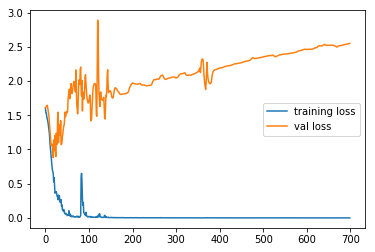

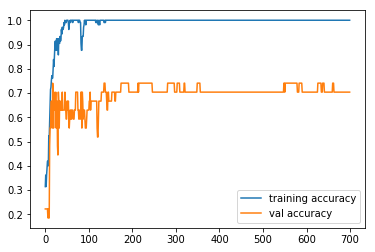

In [225]:
from matplotlib import pyplot as plt

plt.plot(hist.history['loss'],label='training loss')
plt.plot(hist.history['val_loss'],label='val loss')
plt.legend()
plt.show()

plt.plot(hist.history['acc'],label='training accuracy')
plt.plot(hist.history['val_acc'],label='val accuracy')
plt.legend()
plt.show()

In [226]:
model.evaluate(embedded_X_test,Y_test)

56/56 [==============================] - 0s 147us/step


[4.041225297110421, 0.5535714030265808]

In [227]:
predictions=model.predict_classes(embedded_X_test)
for i in range(len(X_test)):
    print("{} - {}".format(' '.join(X_test[i]), emoji.emojize(emojis[predictions[i]])))

I want to eat - üç¥
he did not answer - üòì
he got a raise - üòì
she got me a present - üòÅ
ha ha ha it was so funny - üòÅ
he is a good friend - üòÅ
I am upset - üòì
We had such a lovely dinner tonight - üòÅ
where is the food - üòÅ
Stop making this joke ha ha ha - üòÅ
where is the ball - ‚öæ
work is hard - üòÅ
This girl is messing with me - ‚ù§Ô∏è
are you serious ha ha - üòÅ
Let us go play baseball - ‚öæ
This stupid grader is not working - üòì
work is horrible - üòÅ
Congratulation for having a baby - ‚ù§Ô∏è
stop messing around - üòì
any suggestions for dinner - üòÅ
I love taking breaks - ‚ù§Ô∏è
you brighten my day - ‚ù§Ô∏è
I boiled rice - üç¥
she is a bully - üòÅ
Why are you feeling bad - üòì
I am upset - üòì
I worked during my birthday - üòÅ
My grandmother is the love of my life - üòÅ
enjoy your break - ‚öæ
valentine day is near - üòÅ
I miss you so much - ‚ù§Ô∏è
throw the ball - ‚öæ
My life is so boring - üòÅ
she said yes - üòÅ
will you be my valentine - ‚ù§Ô∏